In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from nn import (io, nn, preprocess)
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

(1797, 64)


<Figure size 432x288 with 0 Axes>

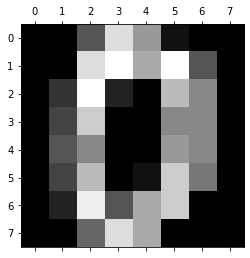

In [2]:
# simulate dataset
digits = load_digits()
print(digits.data.shape)
X_all = digits.data
y_all = digits.target
# view first digit
plt.gray()
plt.matshow(digits.images[0])
plt.show()

In [3]:
# split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=0.33, random_state=42)
print(X_train.shape)
print(y_train.shape)

(1203, 64)
(1203,)


In [4]:
"""
Autoencoder with 64 x 16 x 64 x 1 layers
The two first layers use a ReLU activation function because the digits can be
considered as a linear function with outputs ranging from 0 to 9. The final 
layer is a single node that condenses the output with a sigmoid activation function.
This compresses the values to be between 0 and 1.
"""
test_arch = [{'input_dim': 64, 'output_dim': 16, 'activation': 'relu'},{'input_dim': 16, 'output_dim': 64, 'activation': 'relu'},{'input_dim': 64, 'output_dim': 1, 'activation': 'sigmoid'}]

	
<br>
	Selection of hyperparamaters:<br>
	I selected the Mean Square Error loss function because the network is using linear<br>
	regression to separate the digits from 0 to 9.<br>
	I selected the other hyperparameters through trial and error until I got ok results.<br>


In [5]:
nn_auto = nn.NeuralNetwork(nn_arch = test_arch, lr = 0.001, seed = 29, batch_size = 200,epochs = 100, loss_function = "mse")
# because the last layer of the network is a sigmoid function the outputs are between 0 and 1
# so I multiply the y arrays by 0.1 in order to match
(train_auto_loss, val_auto_loss) = nn_auto.fit(X_train.T, y_train * 0.1, X_test.T, y_test * 0.1)
print("DONE")

EPOCH: 1
[0.64830846 0.46477771 0.72180547 0.77690641 0.68058647 0.5778258
 0.67160542 0.64838545 0.76209853 0.73409012]
[0.6 0.9 0.3 0.7 0.2 0.1 0.5 0.2 0.5 0.2]
EPOCH: 2
[0.10843648 0.04269858 0.0791031  0.07817551 0.05181524 0.07478753
 0.05917734 0.19234606 0.12914358 0.10062673]
[0.6 0.9 0.3 0.7 0.2 0.1 0.5 0.2 0.5 0.2]
EPOCH: 3
[0.29792527 0.17098443 0.23942107 0.26141964 0.15967974 0.20389098
 0.19841243 0.36198967 0.30108172 0.28528141]
[0.6 0.9 0.3 0.7 0.2 0.1 0.5 0.2 0.5 0.2]
EPOCH: 4
[0.57582585 0.45255235 0.50615765 0.65889161 0.39301465 0.45564649
 0.51504427 0.55516211 0.56051583 0.55766404]
[0.6 0.9 0.3 0.7 0.2 0.1 0.5 0.2 0.5 0.2]
EPOCH: 5
[0.4781814  0.33390077 0.33917243 0.47902716 0.27755095 0.34144179
 0.38361104 0.45264151 0.47357926 0.39573805]
[0.6 0.9 0.3 0.7 0.2 0.1 0.5 0.2 0.5 0.2]
EPOCH: 6
[0.51964203 0.37713613 0.39110905 0.55943067 0.33064528 0.38515714
 0.43349685 0.47782512 0.52636023 0.4548169 ]
[0.6 0.9 0.3 0.7 0.2 0.1 0.5 0.2 0.5 0.2]
EPOCH: 7
[0.50645

[0.66107148 0.64346096 0.21637934 0.57749371 0.17626362 0.37527711
 0.39957331 0.23421793 0.59713048 0.19655363]
[0.6 0.9 0.3 0.7 0.2 0.1 0.5 0.2 0.5 0.2]
EPOCH: 69
[0.71365209 0.73170375 0.31867581 0.67402542 0.2525371  0.46377171
 0.44557706 0.32107417 0.66408731 0.31901854]
[0.6 0.9 0.3 0.7 0.2 0.1 0.5 0.2 0.5 0.2]
EPOCH: 70
[0.65998497 0.6078635  0.236646   0.56148329 0.1955352  0.38736904
 0.41006269 0.2479533  0.58936268 0.22170563]
[0.6 0.9 0.3 0.7 0.2 0.1 0.5 0.2 0.5 0.2]
EPOCH: 71
[0.70995769 0.72346593 0.30288312 0.6578458  0.25075921 0.46990308
 0.44257368 0.30198904 0.656196   0.29411506]
[0.6 0.9 0.3 0.7 0.2 0.1 0.5 0.2 0.5 0.2]
EPOCH: 72
[0.66152867 0.59884425 0.214627   0.54719603 0.18903087 0.37943282
 0.40728854 0.22517468 0.58509474 0.19660766]
[0.6 0.9 0.3 0.7 0.2 0.1 0.5 0.2 0.5 0.2]
EPOCH: 73
[0.71314779 0.70664186 0.28789335 0.63749927 0.24143232 0.44857023
 0.43926866 0.28331654 0.62675345 0.27736753]
[0.6 0.9 0.3 0.7 0.2 0.1 0.5 0.2 0.5 0.2]
EPOCH: 74
[0.6643705

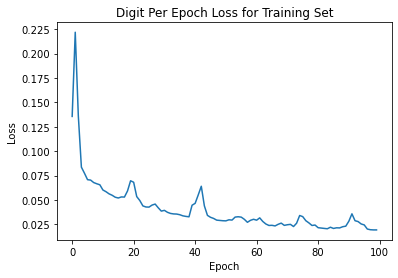

In [6]:
# plot losses
plt.figure()
plt.plot(train_auto_loss)
plt.title("Digit Per Epoch Loss for Training Set")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

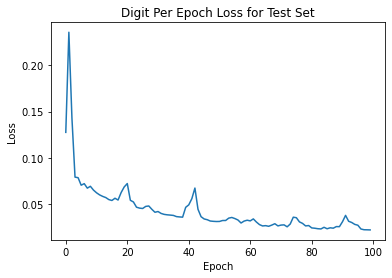

In [7]:
plt.figure()
plt.plot(val_auto_loss)
plt.title("Digit Per Epoch Loss for Test Set")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [8]:
# Evaluate
model_prob = nn_auto.predict(X_test.T)
model_pred = np.floor(model_prob * 10)
print(model_prob[0:10])
print(model_pred[0:10])
print(y_test[0:10])
print('CONFUSION MATRIX')
print(confusion_matrix(y_test, model_pred))
print('CLASSFICATION REPORT')
print(classification_report(y_test, model_pred))

[0.68405881 0.6862269  0.25112669 0.60941614 0.2317317  0.4061877
 0.42273879 0.22857789 0.52304611 0.21025906]
[6. 6. 2. 6. 2. 4. 4. 2. 5. 2.]
[6 9 3 7 2 1 5 2 5 2]
CONFUSION MATRIX
[[37 14  3  1  0  0  0  0  0  0]
 [ 5 21 11 12  5  1  0  0  0  0]
 [ 4 24 20  4  0  0  0  0  0  0]
 [ 0  7 13 17  9  9  1  0  0  0]
 [ 0  8  5 23 16  9  2  0  1  0]
 [ 0  1  1  3 25 23 19  1  0  0]
 [ 0  0  2  2  7 19 26  1  0  0]
 [ 0  0  0  1  2  6 24 23  6  0]
 [ 0  0  2  3  5  5 14 19  4  0]
 [ 0  0  1  0  3  7 10 25 21  1]]
CLASSFICATION REPORT
              precision    recall  f1-score   support

           0       0.80      0.67      0.73        55
           1       0.28      0.38      0.32        55
           2       0.34      0.38      0.36        52
           3       0.26      0.30      0.28        56
           4       0.22      0.25      0.24        64
           5       0.29      0.32      0.30        73
           6       0.27      0.46      0.34        57
           7       0.33      0.3

In [9]:
# Reconstruction Error
(y_hat,cache) = nn_auto.forward(X_test.T)
# the reconstructed images are stored in A2 -- the output of the second layer
reconstruction = cache['A2']
print("RECONSTRUCTION ERROR (MSE)")
reconstruction_error = nn_auto._mean_squared_error(X_test.T, reconstruction)
print(reconstruction_error)
print("PREDICTION ERROR (MSE)")
prediction_error = nn_auto._mean_squared_error(y_test, model_pred)
print(prediction_error)
print("On average, the predicted digit is within " + str(round(np.sqrt(prediction_error), 2)) + " of the actual digit")

RECONSTRUCTION ERROR (MSE)
55.48969619936001
PREDICTION ERROR (MSE)
2.5454545454545454
On average, the predicted digit is within 1.6 of the actual digit
